In [1]:
import gymnasium as gym
import ray
from ray import air, tune
from ray.rllib.algorithms.algorithm import Algorithm
from ray.tune.registry import get_trainable_cls

c:\Users\TeamD\.conda\envs\rllib\lib\site-packages\tensorflow_probability\python\__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <


In [2]:
ray.__version__
# using nightly 3.0.0 build since gymnasium isn't supported in 2.3

'3.0.0.dev0'

In [3]:
ray.init()

Usage stats collection is enabled by default for nightly wheels. To disable this, run the following command: `ray disable-usage-stats` before starting Ray. See https://docs.ray.io/en/master/cluster/usage-stats.html for more details.


2022-12-31 15:04:15,242	INFO worker.py:1536 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.15
Ray version:,3.0.0.dev0
Dashboard:,http://127.0.0.1:8265


In [4]:
import platoonenv
env_cls = platoonenv.PlatoonEnvV1
env=env_cls()

In [5]:
ray.rllib.utils.check_env(env)

2022-12-31 15:04:18,275	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
2022-12-31 15:04:18,276	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


In [6]:
# env_name = "CartPole-v1"
from ray.rllib.algorithms.ppo import PPOConfig
from ray.rllib.algorithms.dqn import DQNConfig
# train_class = "PPO"
# config = (
#     PPOConfig()
#     .environment(env_cls)
#     .framework("torch")
#     .rollouts(num_rollout_workers=10)
#     .resources(num_gpus=0)
    
# )
train_class="DQN"
config = (
    DQNConfig()
    .environment(env_cls)
    .framework("torch")
    .rollouts(num_rollout_workers=10)
    .resources(num_gpus=0)
)

In [8]:
stop = {
    "training_iteration": 200,
    "timesteps_total": 800_000,
    "episode_reward_mean": env.metadata["reward_threshold"],
}
print(stop["episode_reward_mean"])

-48


In [71]:
resume = False
resume_path = "C:/Users/TeamD/ray_results/PPO"
if resume:
    tuner = tune.Tuner.restore(resume_path)
else:
    tuner = tune.Tuner(
        train_class,
        param_space=config.to_dict(),
        run_config=air.RunConfig(
            stop=stop,
            verbose=2,
            checkpoint_config=air.CheckpointConfig(
                checkpoint_frequency=1, checkpoint_at_end=True
            ),
        ),
    )

2022-12-31 15:59:04,413	INFO experiment_analysis.py:795 -- No `self.trials`. Drawing logdirs from checkpoint file. This may result in some information that is out of sync, as checkpointing is periodic.


In [72]:
results = tuner.fit()

2022-12-31 15:59:08,756	INFO trial_runner.py:695 -- A local experiment checkpoint was found and will be used to restore the previous experiment state.
2022-12-31 15:59:08,758	INFO trial_runner.py:832 -- Using following checkpoint to resume: C:\Users\TeamD\ray_results\PPO\experiment_state-2022-12-31_15-04-31.json
2022-12-31 15:59:08,797	WARNING trial_runner.py:837 -- Attempting to resume experiment from C:\Users\TeamD\ray_results\PPO. This will ignore any new changes to the specification.
2022-12-31 15:59:08,869	INFO tune.py:711 -- TrialRunner resumed, ignoring new add_experiment but updating trial resources.
2022-12-31 15:59:09,797	INFO tune.py:774 -- Total run time: 1.05 seconds (0.00 seconds for the tuning loop).


In [11]:
checkpoint = results.get_best_result().checkpoint
# Checkpoint(local_path=C:\Users\TeamD\ray_results\PPO\PPO_PlatoonEnvV1_56ad8_00000_0_2022-12-31_15-04-31\checkpoint_000200)
assert checkpoint is not None, "checkpoint doesn't exist, training failed?"
print(checkpoint)
algo = Algorithm.from_checkpoint(checkpoint)

2022-12-31 15:53:21,158	WARNING algorithm_config.py:614 -- Cannot create PPOConfig from given `config_dict`! Property __stdout_file__ not supported.


Checkpoint(local_path=C:\Users\TeamD\ray_results\PPO\PPO_PlatoonEnvV1_56ad8_00000_0_2022-12-31_15-04-31\checkpoint_000200)


(pid=14904) c:\Users\TeamD\.conda\envs\rllib\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
(pid=14904)   import imp, sys, os
(pid=10716) c:\Users\TeamD\.conda\envs\rllib\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
(pid=10716)   import imp, sys, os
(pid=14904) c:\Users\TeamD\.conda\envs\rllib\lib\site-packages\tensorflow_probability\python\__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=14904)   if (distutils.version.LooseVersion(tf.__version__) <
(pid=10716) c:\Users\TeamD\.conda\envs\rllib\lib\site-packages\tensorflow_probability\python\__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=10716)   if (distutils.ver

In [12]:
obs, info = env.reset()

In [13]:
import numpy as np
num_episodes = 0
episode_reward = 0.0
episode_steps = 0
truncated_already = False
actions = []
rewards = []
while num_episodes < 10:
    # Compute an action (`a`).
    a = algo.compute_single_action(
        observation=obs,
        explore=False,
        policy_id="default_policy",  # <- default value
    )
    # Send the computed action `a` to the env.
    obs, reward, done, truncated, _ = env.step(a)
    actions.append(a)
    rewards.append(reward)
    episode_reward += reward
    episode_steps += 1

    if done or truncated:
        print("ind, act, rew\n",np.array(np.vstack([np.arange(1,11), actions, rewards])))
        print("obs\n",obs.reshape(2,10))
        print(f"Episode done: Total reward = {episode_reward}, steps = {episode_steps}")
        obs, info = env.reset()
        actions = []
        rewards = []
        num_episodes += 1
        episode_steps = 0
        episode_reward = 0.0
        truncated_already = False

ind, act, rew
 [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 9.  7.  6.  5.  1.  4. 10.  3.  5.  5.]
 [-9. -8. -7. -6. -5. -4. -3. -2. -3. -2.]]
obs
 [[  1.   0.   1.   1.   1.   1.   1.   0.   1.   1.]
 [  0. -10.   0.   0.   0.   0.   0. -10.   0.   0.]]
Episode done: Total reward = -49.0, steps = 10
ind, act, rew
 [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [10.  9.  5.  8.  7.  1.  3.  6.  5.  5.]
 [-9. -8. -7. -6. -5. -4. -3. -2. -3. -2.]]
obs
 [[  1.   0.   1.   0.   1.   1.   1.   1.   1.   1.]
 [  0. -10.   0. -10.   0.   0.   0.   0.   0.   0.]]
Episode done: Total reward = -49.0, steps = 10
ind, act, rew
 [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [10.  9.  2.  7.  1.  5.  4.  6.  5.  5.]
 [-9. -8. -7. -6. -5. -4. -3. -2. -3. -2.]]
obs
 [[  1.   1.   0.   1.   1.   1.   1.   0.   1.   1.]
 [  0.   0. -10.   0.   0.   0.   0. -10.   0.   0.]]
Episode done: Total reward = -49.0, steps = 10
ind, act, rew
 [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  8.  6.  2.  5. 10.  3. 

In [18]:
obs, info = env.reset()
from itertools import count
for i in count():
    a = algo.compute_single_action(
        observation=obs,
        explore=False,
        policy_id="default_policy",  # <- default value
    )
    # Send the computed action `a` to the env.
    obs, reward, done, truncated, _ = env.step(a)
    print(a, reward, "\n",obs.reshape(2,-1))
    if done or truncated:
        break

6 -9.0 
 [[  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0. -10. -10.   0.   0.   0.   0.   0.]]
7 -8.0 
 [[  0.   0.   0.   0.   0.   1.   1.   0.   0.   0.]
 [  0.   0.   0. -10. -10.   0.   0.   0.   0.   0.]]
1 -7.0 
 [[  1.   0.   0.   0.   0.   1.   1.   0.   0.   0.]
 [  0.   0.   0. -10. -10.   0.   0.   0.   0.   0.]]
9 -6.0 
 [[  1.   0.   0.   0.   0.   1.   1.   0.   1.   0.]
 [  0.   0.   0. -10. -10.   0.   0.   0.   0.   0.]]
2 -5.0 
 [[  1.   1.   0.   0.   0.   1.   1.   0.   1.   0.]
 [  0.   0.   0. -10. -10.   0.   0.   0.   0.   0.]]
10 -4.0 
 [[  1.   1.   0.   0.   0.   1.   1.   0.   1.   1.]
 [  0.   0.   0. -10. -10.   0.   0.   0.   0.   0.]]
8 -3.0 
 [[  1.   1.   0.   0.   0.   1.   1.   1.   1.   1.]
 [  0.   0.   0. -10. -10.   0.   0.   0.   0.   0.]]
3 -2.0 
 [[  1.   1.   1.   0.   0.   1.   1.   1.   1.   1.]
 [  0.   0.   0. -10. -10.   0.   0.   0.   0.   0.]]
9 -3.0 
 [[  1.   1.   1.   0.   0.   1.   1.   1.   0.   1.]
 [  0.   

In [19]:
env.reset()

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -10.,
          0.,   0.,   0.,   0.,   0., -10.,   0.,   0.,   0.],
       dtype=float32),
 {})

In [27]:
env.step(0)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -10.,
          0.,   0.,   0.,   0.,   0., -10.,   0.,   0.,   0.],
       dtype=float32),
 -19.0,
 False,
 False,
 {})

(array([941., 870., 895., 943., 887., 910., 911., 871., 898., 913., 961.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <BarContainer object of 11 artists>)

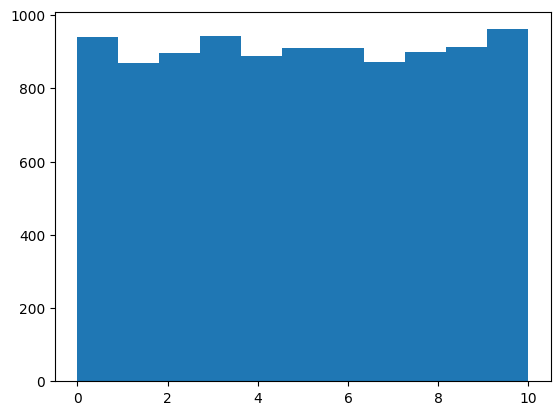

In [70]:
import matplotlib.pylab as plt
plt.hist([env.action_space.sample() for _ in range(10000)], bins=env.action_space.n)

In [15]:
# algo.stop()
# ray.shutdown()